## IMPORTING LIBRARIES

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as MSE
from sklearn.linear_model import Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor

## IMPORTING DATASET

In [ ]:
dataset = pd.read_csv('/content/drive/MyDrive/Design Credits/final_data.csv')
dataset

,Unnamed: 0,Number of gates,Number of flops,Number of Test Vectors,Equivalent Area of Block,Test Power(in uJoules)
0,0,695,283,3,576,694.915209
1,1,755,289,5,976,699.192675
2,2,765,289,5,1036,697.822985
3,3,805,295,6,1176,709.831915
4,4,805,294,7,1176,707.501416
...,...,...,...,...,...,...
5627,5627,775,289,4,976,700.733356
5628,5628,910,299,5,1626,711.156631
5629,5629,825,289,3,1226,695.672885
5630,5630,835,294,4,1256,706.976219


In [ ]:
x = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

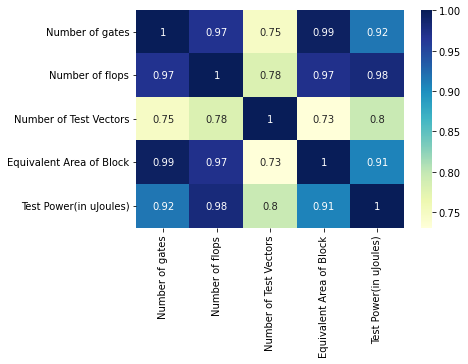

In [ ]:
dataset1 = dataset.drop(labels = ["Unnamed: 0"],axis=1)
sb.heatmap(dataset1.corr(), cmap="YlGnBu", annot=True)

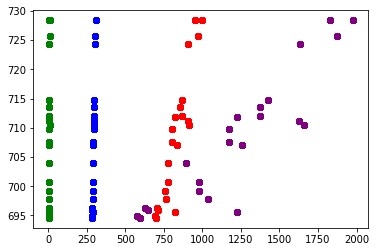

In [ ]:
plt.scatter(dataset.iloc[:,1],y,color = 'red')
plt.scatter(dataset.iloc[:,2],y,color = 'blue')
plt.scatter(dataset.iloc[:,3],y,color = 'green')
plt.scatter(dataset.iloc[:,4],y,color = 'purple')


plt.show()

## Splitting into training and testing sets

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=1)

In [ ]:
MSE_list = dict()

## least square regression

In [ ]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)
MSE_list["linear regression"] = MSE(y_pred,y_test)

In [ ]:
print(MSE(y_pred,y_test))

9.642282880056003e-26


## Ridge regression

In [ ]:
reg_ridge = Ridge(alpha = 1)
reg_ridge.fit(x_train,y_train)
y_pred_ridge = reg_ridge.predict(x_test)
MSE_list["ridge regression"] = MSE(y_pred_ridge,y_test)

In [ ]:
print(MSE(y_pred_ridge,y_test))

1.2483856549422917e-07


## Nearest neighbour regression

In [ ]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(x_train,y_train)
y_pred_knn = neigh.predict(x_test)
MSE_list["KNN"] = MSE(y_pred_knn,y_test)

In [ ]:
print(MSE(y_pred_knn,y_test))

3.4873738842842146e-27


## Neural network regression 

In [ ]:
reg_nnr = MLPRegressor(random_state=1,max_iter = 2000)
reg_nnr.fit(x_train,y_train)
y_predict_nnr = reg_nnr.predict(x_test)
MSE_list["neural network regression"] = MSE(y_predict_nnr,y_test)

In [ ]:
print(MSE(y_predict_nnr,y_test))

0.37898858959850545


In [ ]:
# printing all mse values with models
mse = pd.DataFrame({"Models" : MSE_list.keys() , "MSE" : MSE_list.values()})
mse

,Models,MSE
0,linear regression,9.642283e-26
1,ridge regression,1.248386e-07
2,KNN,3.487374e-27
3,neural network regression,3.789886e-01


In [ ]:
# here since the dataset was made with linear data, the minimum 
# MSE value we get is from Linear regression